# Part 2

### Question 1

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import *

Text(0.5,1,'reward_function_2')

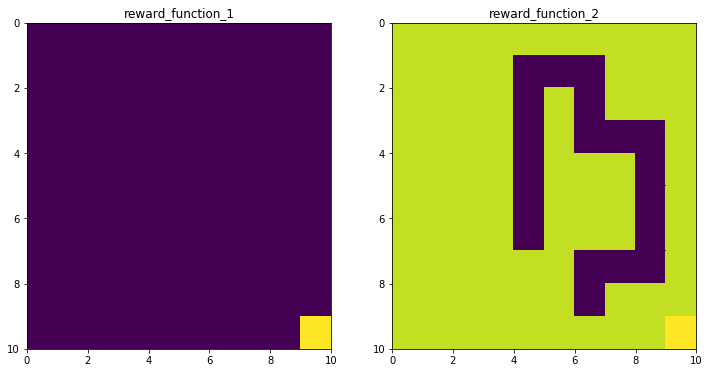

In [13]:
reward_function_1 = np.zeros((10,10))
reward_function_1[-1,-1] = 1


reward_function_2 = reward_function_1.copy()
locs = [(1,4),(2,4),(3,4),(4,4),(5,4),
           (6,4),(1,5),(1,6),(2,6),(3,6),
           (3,7),(3,8),(4,8),(5,8),(6,8),
           (7,8),(7,6),(7,7),(8,6)]

reward_function_2[-1,-1] = 10
for loc in locs:
    reward_function_2[loc] = -100
    
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].set_ylim(bottom=10, top=0)
ax[0].pcolor(reward_function_1)
ax[0].set_title('reward_function_1')
ax[1].set_ylim(bottom=10, top=0)
ax[1].pcolor(reward_function_2)
ax[1].set_title('reward_function_2')

### Question 2/3/4

In [14]:
def update_value(values,R, discount,s,w):
    actions = [-10,+10,-1,+1,0]# action = [up,down,left,right,self]
    p_temp = np.zeros(5)# action = [up,down,left,right，self]

    # preset the random
    p_temp[2] = 0 if s%10 == 0 else w/4 # left
    p_temp[3] = 0 if (s+1)%10 == 0 else w/4 # right
    p_temp[0] = 0 if s-10 <= 0 else w/4 #up
    p_temp[1] = 0 if s+10 >= 100 else w/4 #bot
    p_temp[-1] = w-sum(p_temp[0:4])

    # value of state in different direction
    v_temp = np.zeros(4) #[up,down,left,right，self]
    for i,a in enumerate(actions[0:4]):
        p = p_temp.copy()
        if p_temp[i] != 0:
            p[i] += 1-w # move in one direction
        else:
            p[-1] += 1-w # return to self
        
        # sum of all possible states
        for j,a in enumerate(actions):
            if p[j] != 0 :#and s+a in range(100):
                v_temp[i] += p[j]*(R[0,s+a] + discount*values[0,s+a]) 
                
    return np.max(v_temp) 

def update_policy(values,R, discount,s,w):
    actions = [-10,+10,-1,+1,0]# action = [up,down,left,right,self]
    p_temp = np.zeros(5)# action = [up,down,left,right，self]

    # preset the random
    p_temp[2] = 0 if s%10 == 0 else w/4 # left
    p_temp[3] = 0 if (s+1)%10 == 0 else w/4 # right
    p_temp[0] = 0 if s-10 <= 0 else w/4 #up
    p_temp[1] = 0 if s+10 >= 100 else w/4 #bot
    p_temp[-1] = w-sum(p_temp[0:4])

    # value of state in different direction
    v_temp = np.zeros(4) #[up,down,left,right，self]
    for i,a in enumerate(actions[0:4]):
        p = p_temp.copy()
        if p_temp[i] != 0:
            p[i] += 1-w # move in one direction
        else:
            p[-1] += 1-w # return to self
        
        # sum of all possible states
        for j,a in enumerate(actions):
            if p[j] != 0 :#and s+a in range(100):
                v_temp[i] += p[j]*(R[0,s+a] + discount*values[0,s+a]) 
   
    policy = ['↑','↓','←','→']
    return policy[np.argmax(v_temp)]
       

In [15]:
print(DataFrame(reward_function_1))

     0    1    2    3    4    5    6    7    8    9
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0


In [16]:
# def state_value(graph):
e = 0.001
w = 0.1
discount = 0.8

reward_function = reward_function_1.copy()
# initialization all value = 0
# reshape to 1D array 
values = np.zeros(reward_function.shape).reshape(1,-1)
R = reward_function.reshape(1,-1)

delta = float('inf')
while delta > e:
    delta = 0
    for s in range(reward_function_1.size): 
        v = values[0,s]
        values[0,s] = update_value(values,R, discount,s,w)
        delta = max(delta,abs(v-values[0,s]))


In [17]:
print(DataFrame(reward_function))

     0    1    2    3    4    5    6    7    8    9
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0


Text(0.5,1,'state_value for reward_function_1')

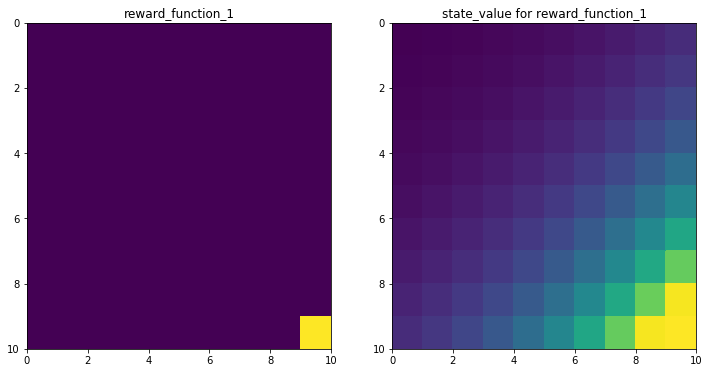

In [18]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].set_ylim(bottom=10, top=0)
ax[0].pcolor(reward_function_1)
ax[0].set_title('reward_function_1')
ax[1].set_ylim(bottom=10, top=0)
ax[1].pcolor(values.reshape((10,10)))
ax[1].set_title('state_value for reward_function_1')

### Question 5

In [19]:
policy = [[0]*10]*10
for i in range(10):
    for j in range(10):
        policy[i][j] = update_policy(values,R, discount,i*10+j,w)
print(DataFrame(policy))

   0  1  2  3  4  5  6  7  8  9
0  →  →  →  →  →  →  →  →  →  ↓
1  →  →  →  →  →  →  →  →  →  ↓
2  →  →  →  →  →  →  →  →  →  ↓
3  →  →  →  →  →  →  →  →  →  ↓
4  →  →  →  →  →  →  →  →  →  ↓
5  →  →  →  →  →  →  →  →  →  ↓
6  →  →  →  →  →  →  →  →  →  ↓
7  →  →  →  →  →  →  →  →  →  ↓
8  →  →  →  →  →  →  →  →  →  ↓
9  →  →  →  →  →  →  →  →  →  ↓


## Question 6/7/8/9

     0    1    2    3      4      5      6      7      8     9
0  0.0  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0   0.0
1  0.0  0.0  0.0  0.0 -100.0 -100.0 -100.0    0.0    0.0   0.0
2  0.0  0.0  0.0  0.0 -100.0    0.0 -100.0    0.0    0.0   0.0
3  0.0  0.0  0.0  0.0 -100.0    0.0 -100.0 -100.0 -100.0   0.0
4  0.0  0.0  0.0  0.0 -100.0    0.0    0.0    0.0 -100.0   0.0
5  0.0  0.0  0.0  0.0 -100.0    0.0    0.0    0.0 -100.0   0.0
6  0.0  0.0  0.0  0.0 -100.0    0.0    0.0    0.0 -100.0   0.0
7  0.0  0.0  0.0  0.0    0.0    0.0 -100.0 -100.0 -100.0   0.0
8  0.0  0.0  0.0  0.0    0.0    0.0 -100.0    0.0    0.0   0.0
9  0.0  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0  10.0
   0  1  2  3  4  5  6  7  8  9
0  →  →  →  →  →  →  →  →  →  ↓
1  →  →  →  →  →  →  →  →  →  ↓
2  →  →  →  →  →  →  →  →  →  ↓
3  →  →  →  →  →  →  →  →  →  ↓
4  →  →  →  →  →  →  →  →  →  ↓
5  →  →  →  →  →  →  →  →  →  ↓
6  →  →  →  →  →  →  →  →  →  ↓
7  →  →  →  →  →  →  →  →  →  ↓
8  →  →  →  →  →  →

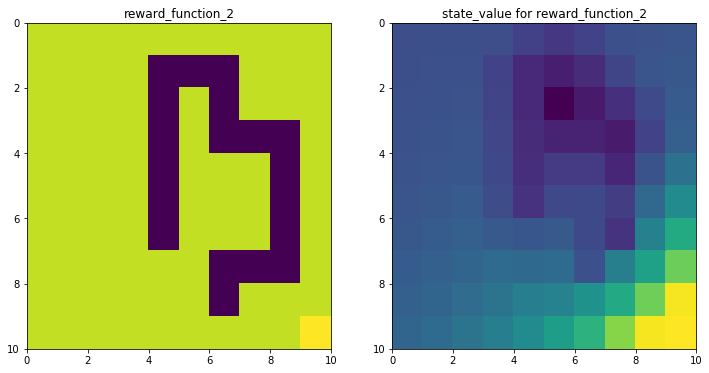

In [20]:
# def state_value(graph):
e = 0.01
w = 0.1
discount = 0.8

reward_function = reward_function_2.copy()
# initialization all value = 0
# reshape to 1D array 
values = np.zeros(reward_function.shape).reshape(1,-1)
R = reward_function.reshape(1,-1)

delta = float('inf')
while delta > e:
    delta = 0
    for s in range(reward_function_1.size): 
        v = values[0,s]
        values[0,s] = update_value(values,R, discount,s,w)
        delta = max(delta,abs(v-values[0,s]))

print(DataFrame(reward_function))
        
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].set_ylim(bottom=10, top=0)
ax[0].pcolor(reward_function_2)
ax[0].set_title('reward_function_2')
ax[1].set_ylim(bottom=10, top=0)
ax[1].pcolor(values.reshape((10,10)))
ax[1].set_title('state_value for reward_function_2')

policy = [[0]*10]*10
for i in range(10):
    for j in range(10):
        policy[i][j] = update_policy(values,R, discount,i*10+j,w)
print(DataFrame(policy))